# Разведочный анализ данных: Data Visualization. Практическая работа

Сдаётся на проверку.

## Цели практической работы
1. Познакомиться с библиотекой matplotlib.
2. Потренирироваться выявлять аномалии в данных при помощи визуализации и обрабатывать их.
3. Потренироваться строить графики для количественных переменных.
4. Потренироваться строить графики для категориальных переменных.
5. Потренироваться выявлять зависимости в данных при помощи визуализации и формул.
6. Подготовить датафрейм к этапу генерации признаков.

## Что входит в практическую работу
1. Загрузить датасет и ознакомиться с ним.
2. Исследовать данные на аномальные значения и скорректировать выбросы.
3. Построить графика для количественных переменных.
4. Построить графика для категориальных переменных.
5. Исследовать зависимости в данных. 

## Что оценивается
- Программа выдаёт верный ответ на заданном наборе данных.
- Описаны причины выбранного решения, если требуется.
- Код читабелен: переменным даны осмысленные названия, отступы и правила расстановки пробелов соблюдены.
- При построении графиков название и оси подписаны, выведена легенда, если требуется. 
- Репозиторий проекта содержит осмысленные коммиты, содержащие конкретные реализованные фичи, ветки названы согласно назначению, лишние файлы не хранятся в репозитории.
- В репозитории проекта соблюдена иерархия директорий согласно списку модулей и содержащихся в них тем.
- Репозиторий проекта содержит файлы с данными, полученными в результате выполнения практической работы.


## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему проверяющему куратору.


## Задача

Мы продолжим исследовать и готовить данные для этапа моделирования.

Вам предстоит работать с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах, представленной в файле `data/vehicles_dataset_upd.csv`. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

В этой практической работе вы продолжите знакомиться с визуализацией данных и выявлением аномалий при помощи `matplotlib`, а также выявлением зависимостей в данных.


## Описание датасета:
- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.


In [2]:
# Импортируйте необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt

### Задача 1. Выявление аномалий в стоимости автомобиля

1. Загрузите датасет из `data/vehicles_dataset_upd.csv` и выведите первые 5 записей.


In [3]:
# Ваш код здесь
df = pd.read_csv('data/vehicles_dataset_upd.csv')
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


2. Постройте гистограмму распределения стоимости автомобиля, настройте размер фигуры — 8x5, цвет — `indigo`.
Не забудьте подписать название графика и оси.

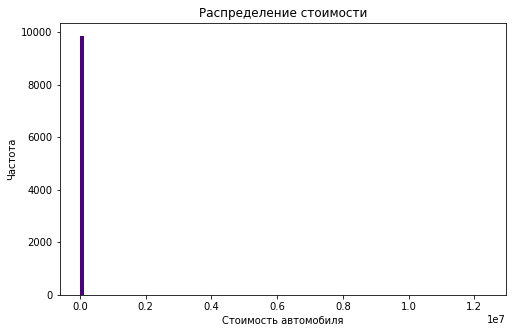

In [4]:
# Ваш код здесь
plt.figure(figsize=(8,5))
plt.hist(df.price, bins=100, color='indigo')
plt.xlabel('Стоимость автомобиля')
plt.ylabel('Частота')
plt.title('Распределение стоимости');

3. График гистограммы в таком виде не дает представления о реальном распределении, но из него можно сделать вывод о наличии выбросов.
Постройте «ящик с усами» для стоимости автобомиля, настройте размер фигуры — 5x15, а также примените форматирование для отображения значений стоимости.
Не забудьте подписать название графика и оси.

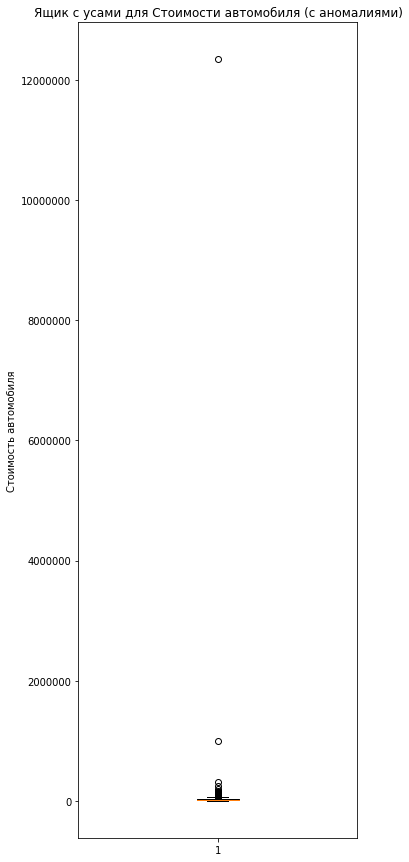

In [5]:
# Ваш код здесь
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(df.price)
ax.set_ylabel('Стоимость автомобиля')
ax.set_title('Ящик с усами для Стоимости автомобиля (с аномалиями)')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

4. Из «ящика с усами» можно увидеть, что выбросы действительно существуют, но из-за их большого разброса основаная часть графика («ящик») почти незаметна.
Выведете описательные статистики стоимости автомобиля, чтобы изучить значения, обозначающие границы «ящика». С помощью `apply(lambda x: f"{x:0.3f}")` отобразите значения в удобном для восприятия виде.

In [11]:
# Ваш код здесь
df.price.describe().apply(lambda x: f"{x:0.3f}")

count        9868.000
mean        20602.005
std        125437.186
min           500.000
25%          7800.000
50%         15590.000
75%         27990.000
max      12345678.000
Name: price, dtype: object

5. Выведете границы для нормальных значений стоимости автомобиля, используя интерквартильный размах. Посмотрите, входят ли минимальное и максимальное значения в интервал между полученными границами.

In [7]:
# Ваш код здесь
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5*iqr, q75 + 1.5*iqr)
    return boundaries
boundaries = calculate_outliers(df.price)
boundaries

(-22485.0, 58275.0)

6. Посчитайте и выведете количество выбросов в стоимости автомобиля. 

In [8]:
# Ваш код здесь
is_outlier = (df.price < boundaries[0]) | (df.price > boundaries[1])
is_outlier.count()

9868

7. Выведете записи, в которых стоимость автомобиля попадает в выбросы, отсортированные по стоимости. Посмотрите на данные и подумайте, могут ли данные выбросы описывать особые значения категории цены или других признаков или действительно являются выбросами.

In [9]:
# Ваш код здесь
df[is_outlier]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
21,7312327909,https://madison.craigslist.org/cto/d/madison-1...,madison,https://madison.craigslist.org,89995,1995,other,oldsmobile 442,gas,111111,clean,automatic,https://images.craigslist.org/00S0S_agk7Nol4CO...,1970 Oldsmobile 442 Convertible 442 Indy Pace ...,wi,43.098400,-89.273400,2021-04-25T10:10:43-0500,high,2021-04-25 15:10:43+00:00
33,7304521734,https://kpr.craigslist.org/ctd/d/pasco-2019-fo...,kennewick-pasco-richland,https://kpr.craigslist.org,79999,2019,ford,f450 deisel power stroke,diesel,41759,clean,automatic,https://images.craigslist.org/00D0D_ctOGGthFxQ...,2019 Ford F450 Lariat FX4 Dually 4x4 **Clean C...,wa,46.234838,-119.128015,2021-04-09T19:46:04-0700,high,2021-04-10 02:46:04+00:00
57,7314413105,https://inlandempire.craigslist.org/ctd/d/cost...,inland empire,https://inlandempire.craigslist.org,69888,1995,ford,coe,gas,1,clean,automatic,https://images.craigslist.org/00M0M_8jgBCZZuG6...,Awesome Resto-Mod COE Ford Car Hauler. Equippe...,ca,33.680100,-117.908500,2021-04-29T10:49:29-0700,high,2021-04-29 17:49:29+00:00
96,7311450619,https://wenatchee.craigslist.org/ctd/d/kittita...,wenatchee,https://wenatchee.craigslist.org,58995,2020,jeep,wrangler,gas,17799,clean,automatic,https://images.craigslist.org/00a0a_chVstv8e4Z...,ＷＩＮＤＹ ＣＨＥＶＲＯＬＥＴ ⭐ No Payments For 90 Days* ⭐...,wa,46.999600,-120.516300,2021-04-23T10:43:27-0700,high,2021-04-23 17:43:27+00:00
142,7305640478,https://siouxfalls.craigslist.org/ctd/d/gilber...,sioux falls / SE SD,https://siouxfalls.craigslist.org,59900,2014,ford,f550 xl,diesel,156000,clean,automatic,https://images.craigslist.org/00x0x_httQ0BwNkq...,**FOR SALE** 2014 Ford F550 Super Duty 45' Al...,sd,42.117274,-88.436783,2021-04-12T10:34:12-0500,high,2021-04-12 15:34:12+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,7316447901,https://tulsa.craigslist.org/cto/d/tulsa-2017-...,tulsa,https://tulsa.craigslist.org,65000,2017,rover,other,gas,47000,clean,automatic,https://images.craigslist.org/00s0s_iGpmplDL99...,"2017 Range Rover HSE, supercharged V8, silver ...",ok,36.126200,-95.940800,2021-05-03T16:37:36-0500,high,2021-05-03 21:37:36+00:00
9823,7315493686,https://palmsprings.craigslist.org/ctd/d/fonta...,palm springs,https://palmsprings.craigslist.org,68995,2016,ram,2500,diesel,61130,clean,automatic,https://images.craigslist.org/00p0p_5PdfAkd0AM...,2016 Ram 2500 Laramie Offered by: R&B Auto...,ca,34.107220,-117.455310,2021-05-01T13:40:57-0700,high,2021-05-01 20:40:57+00:00
9839,7314385254,https://spokane.craigslist.org/ctd/d/puyallup-...,spokane / coeur d'alene,https://spokane.craigslist.org,86977,2017,ford,f450 super duty crew cab,diesel,16806,clean,automatic,https://images.craigslist.org/00H0H_5P0NdUIgHi...,2017 *** Ford F450 Super Duty Crew Cab Platinu...,id,47.197304,-122.291776,2021-04-29T10:03:19-0700,high,2021-04-29 17:03:19+00:00
9846,7307184389,https://holland.craigslist.org/ctd/d/otsego-20...,holland,https://holland.craigslist.org,61022,2020,gmc,sierra 1500,gas,5894,clean,automatic,https://images.craigslist.org/00i0i_64FIhCkyTb...,"2020 GMC Sierra 1500 AT4 -- $61,022 ☎ Call ...",mi,42.448987,-85.661948,2021-04-15T11:05:47-0400,high,2021-04-15 15:05:47+00:00


8. Выведете последние 15 записей в отсортированном ранее датафрейме с выбросами, чтобы изучить признаки для наиболее дорогих автомобилей.

In [10]:
# Ваш код здесь
df[is_outlier].price.value_counts(15)

59999    0.028986
65000    0.024155
69995    0.024155
68999    0.019324
63995    0.019324
           ...   
68495    0.004831
62995    0.004831
67000    0.004831
59980    0.004831
65900    0.004831
Name: price, Length: 137, dtype: float64

9. Среди автомобилей с аномальной стоимостью действительно присуствуют автомобили, высокую стоимость которых можно объяснить, в первучю очередь, производителем и низким пробегом. Но будем опираться на стоимость основной массы автомобилей, поэтому удалите все аномальные значения и сохраните датафрейм без аномалий в переменную `df_new`, выведете первые 5 значений.

In [11]:
# Ваш код здесь
df_new = df[~is_outlier]
df_new.head(5)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


### Задача 2. Исследование зависимости стоимости автомобиля от года производства

1. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год (воспользуейтесь группировкой по годам). Не забудьте переименовать колонки согласно их содержанию.


In [12]:
# Ваш код здесь
stats = df_new.groupby(['year'], as_index=False)[['price']].mean()
stats = stats.rename(columns={'year': 'year', 'price' : 'price_mean'})
stats

,year,price_mean
0,1995,13219.472554
1,1996,9362.960000
2,1997,6441.250000
3,1998,6528.672727
4,1999,7446.641975
5,2000,7614.410256
6,2001,7852.090164
7,2002,7173.798658
8,2003,7767.962162
9,2004,7684.105769


2. Постройте диаграмму рассеяния для визуализации зависимости стоимости от года выпуска автомобиля. Не забудьте подписать название графика и оси.

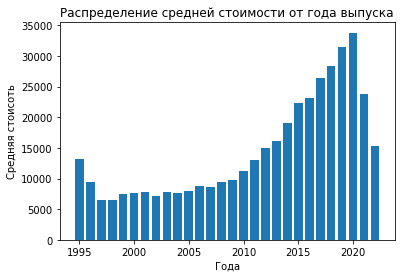

In [13]:
# Ваш код здесь
import matplotlib.pyplot as plt

plt.bar(stats['year'], stats['price_mean'])
plt.xlabel('Года')
plt.ylabel('Средняя стоисоть')
plt.title('Распределение средней стоимости от года выпуска');

3. Из графика можно сделать вывод о возрастающем тренде: чем новее автомобиль, тем выше его цена. Исключение составляют наиболее старые и самые новые автомобили. Проверим, достаточно ли данных в выбивающихся из тренда значениях по годам. Для этого выведете количество автомобилей, произведенных в каждый год, воспользуейтесь группировкой по годам.

In [14]:
# Ваш код здесь
stats2 = df_new.groupby(['year'], as_index=False)[['id']].count()
stats2 = stats2.rename(columns={'id': 'count'})
stats2

,year,count
0,1995,419
1,1996,25
2,1997,44
3,1998,55
4,1999,81
5,2000,78
6,2001,122
7,2002,149
8,2003,185
9,2004,208


4. За последние два года мало накопленной информации — исключим их из исследования. С помощью фильтрации оставьте в датафрейме автомобили, произведенные не позднее 2021 года, выведете первые пять значений датафрейма.

In [15]:
# Ваш код здесь
df_before2021 = df_new[df_new.year <= 2021]
df_before2021.head(5)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


5. На отфильтрованных данных повторите действия по формированию нового датафрейма, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год. Не забудьте переименовать колонки согласно их содержанию.

In [16]:
# Ваш код здесь
stats3 = df_before2021.groupby(['year'], as_index=False)[['price']].mean()
stats3 = stats3.rename(columns={'year': 'year', 'price' : 'price_mean'})
stats3

,year,price_mean
0,1995,13219.472554
1,1996,9362.960000
2,1997,6441.250000
3,1998,6528.672727
4,1999,7446.641975
5,2000,7614.410256
6,2001,7852.090164
7,2002,7173.798658
8,2003,7767.962162
9,2004,7684.105769


6. Постройте линейный график ([plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)) для визуализации зависимости стоимости от года выпуска автомобиля, настройте цвет линии —  `blue`, символ маркировки точек (`marker`) — ромб/алмаз — `D`, цвет точек (`markerfacecolor`) — `orange`. Используйте среднюю стоимость автомобиля, рассчитаную в предыдущем задании.
Не забудьте подписать название графика и оси.

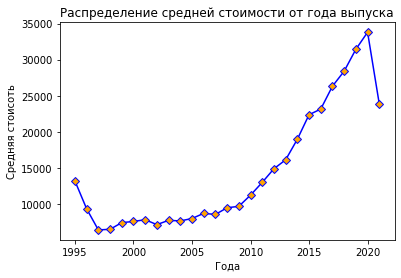

In [17]:
# Ваш код здесь
plt.plot(stats3['year'], stats3['price_mean'],color='blue',marker='D',markerfacecolor='orange')
plt.xlabel('Года')
plt.ylabel('Средняя стоисоть')
plt.title('Распределение средней стоимости от года выпуска');

7. Посчитайте коэффициент корреляции Пирсона для стоимости автомобиля и года его производства. Ответьте на вопросы:


    1. Можно ли сделать вывод о существовании линейной связи между стоимостью автомобиля и годом его производства? Почему?
    Ваш ответ: Коэффицент Корреляции Пирсона 0.07 что говорит о том, что линейой связи нет 

    2. Можно ли сделать вывод о сильной корреляции между стоимостью автомобиля и годом его производства? Почему?
    Ваш ответ: Нет, Коэффицент Корреляции Пирсона 0.07

    3. Существующая связь является прямой или обратной? Почему?
    Ваш ответ: Т.к. знак Коэффицент Корреляции Пирсона больше нуля, то связь слабая положительная

In [18]:
# Ваш код здесь
df.corr()

,id,price,year,odometer,lat,long
id,1.000000,-0.032689,-0.100205,0.048796,-0.077752,-0.106567
price,-0.032689,1.000000,0.072763,-0.057455,0.002235,-0.001371
year,-0.100205,0.072763,1.000000,-0.508796,-0.031854,0.007378
odometer,0.048796,-0.057455,-0.508796,1.000000,0.024401,0.007551
lat,-0.077752,0.002235,-0.031854,0.024401,1.000000,-0.164737
long,-0.106567,-0.001371,0.007378,0.007551,-0.164737,1.000000


8. Для обновленных данных постройте гистограмму распределения стоимости автомобиля, настройте размер фигуры — 8x5, параметры количества интервалов — 20, цвет — indigo. Не забудьте подписать название графика и оси.

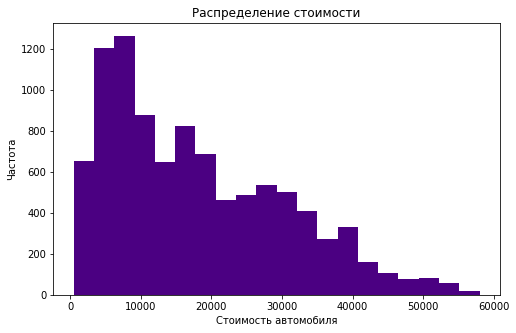

In [19]:
# Ваш код здесь
plt.figure(figsize=(8,5))
plt.hist(df_before2021.price, bins=20, color='indigo')
plt.xlabel('Стоимость автомобиля')
plt.ylabel('Частота')
plt.title('Распределение стоимости');

9. Сохраните для дальнейшего использования датафрейм `df_new` в файл `data/vehicles_dataset_upd2.csv`, индексы не сохраняйте.

In [20]:
# Ваш код здесь
df_before2021.to_csv('data/vehicles_dataset_upd2.csv',index=False)

### Задача 3. Исследование зависимости ценовой категории автомобилиля от стоимости и года производства

1. На одном полотне постройте графики распределения стоимости автомобиля для каждой из ценовой категории автомобиля. Настройти общий размер фигуры — 12x8, параметры прозрачности — 0.7, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории. 

Подумайте, почему полученный график так выглядит?


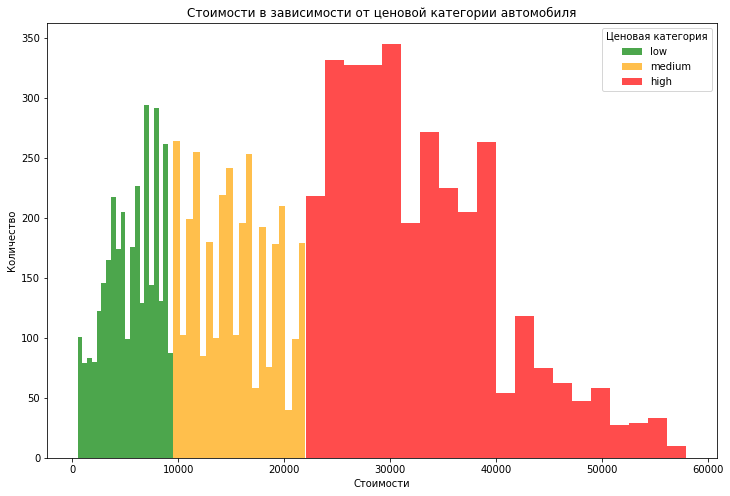

In [21]:
# Ваш код здесь
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}

fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df_before2021[df_before2021['price_category'] == price_category]

    ax.hist(data['price'], bins=20, color=color, alpha=0.7)
    
plt.ylabel('Количество')
plt.xlabel('Стоимости')
plt.title('Стоимости в зависимости от ценовой категории автомобиля')
plt.legend(colors, title="Ценовая категория");

2. На одном полотне постройте диаграмму рассеяния для стоимости автомобиля и его года выпуска. Раскрасьте каждую точку (автомобиль) согласно ценовой категории автомобиля. Настройти общий размер фигуры — 12x8, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории, расположив ее в нижнем правом углу. 

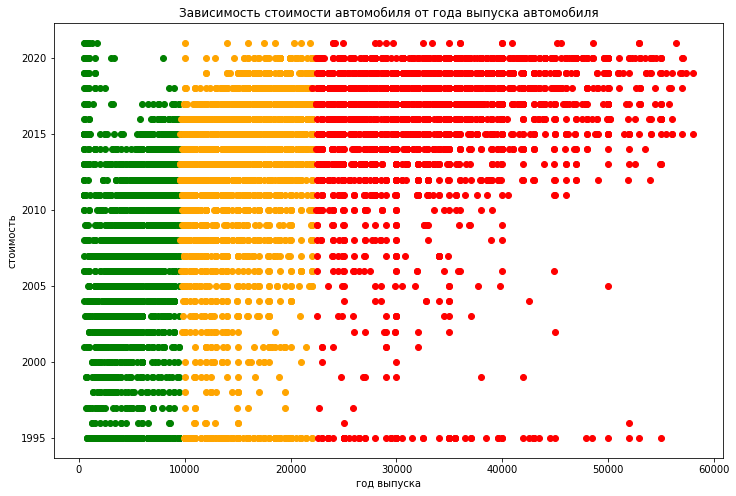

In [31]:
# Ваш код здесь
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}

fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df_before2021[df_before2021['price_category'] == price_category]
    
    ax.scatter(data['price'],data['year'],color=color)

plt.xlabel('год выпуска')
plt.ylabel('стоимость')

plt.show();

### Задача 4. Визуализация категориальных переменных

1. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о производителе автомобиля и количестве произведенных им автомобилей (воспользуейтесь группировкой). Не забудьте переименовать колонки согласно их содержанию.


In [23]:
# Ваш код здесь
stats4 = df.groupby(['manufacturer'], as_index=False)[['id']].count()
stats4 = stats4.rename(columns={'id': 'count'})
stats4

,manufacturer,count
0,acura,149
1,alfa-romeo,13
2,audi,199
3,bmw,311
4,buick,145
5,cadillac,182
6,chevrolet,1286
7,chrysler,160
8,datsun,2
9,dodge,325


2. Постройте столбчатую диаграмму для производителей автомобиля, настройте размер фигуры — 20x10, ширину интервалов (`width`) — 0.9, цвета — чередующиеся `springgreen` и `dodgerblue`. Не забудьте подписать название графика и оси.
Для оси OX разверните подписи на 45 градусов, используя метод `xticks` и его параметр `rotation`.

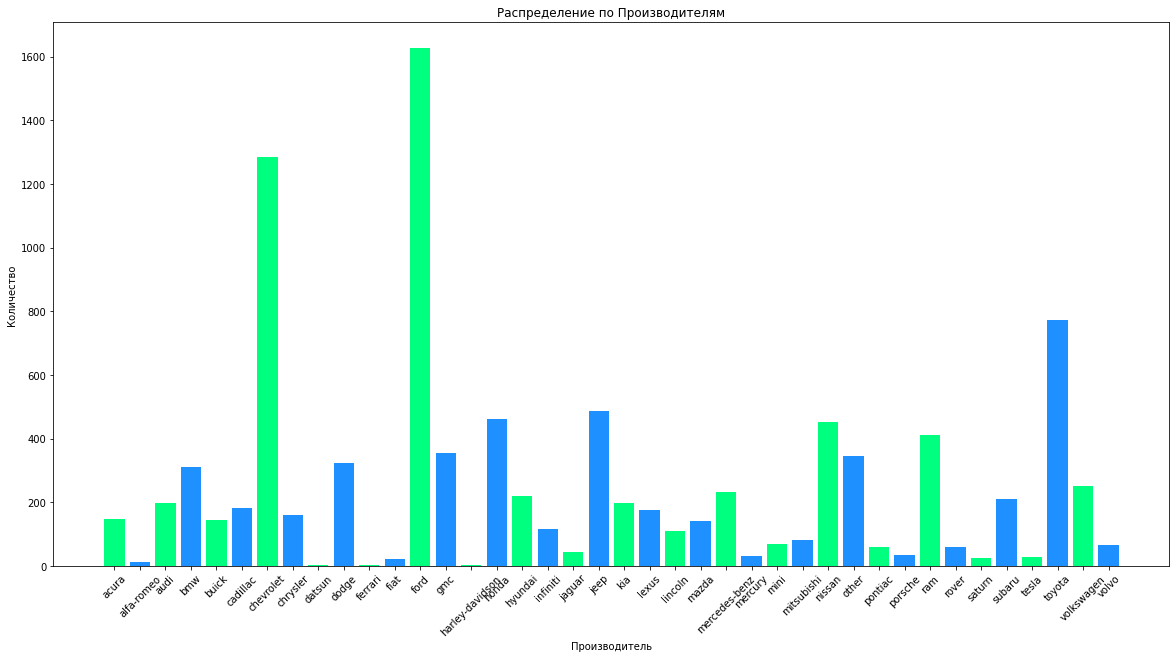

In [24]:
# Ваш код здесь
plt.figure(figsize = (20,10))
plt.bar(stats4['manufacturer'], stats4['count'], color=['springgreen', 'dodgerblue'])
plt.xlabel('Производитель')
plt.xticks(rotation = 45)
plt.ylabel('Количество')
plt.title('Распределение по Производителям');

3. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о коробке передач автомобиля и количестве автомобилей с такой коробкой передач (воспользуейтесь группировкой). Не забудьте переименовать колонки согласно их содержанию.

In [50]:
# Ваш код здесь
stats5 = df.groupby(['transmission'], as_index=False)[['id']].count()
stats5 = stats5.rename(columns={'id': 'count'})
stats5

,transmission,count
0,automatic,7577
1,manual,626
2,other,1665


4. Постройте круговую диаграмму для коробки передач автомобиля, настройте размер фигуры — 12x8, формат подписи о соотношении категорий, расстояние от метки о соотношении категорий до края сегмента. Не забудьте подписать название графика и оси, а также вывести легенду отдельно.


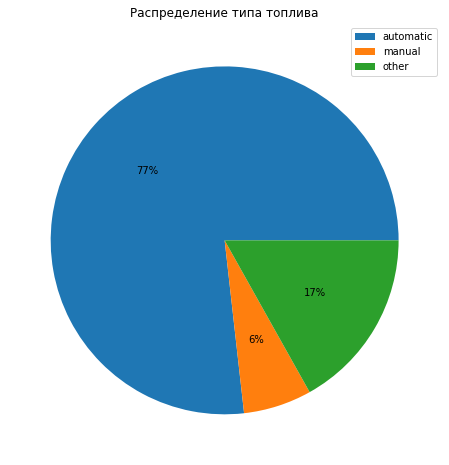

In [53]:
# Ваш код здесь
plt.figure(figsize=(12, 8))
plt.pie(stats5['count'], labels=stats5['transmission'], labeldistance=None, autopct = '%1.0f%%')
plt.title("Распределение типа топлива")
plt.legend()
plt.show();